# Setup

**Imports**

In [13]:
import datetime as dt
from math import log
import IPython

import matplotlib.pyplot as plt
import numpy as np
import ruptures as rpt

import seaborn as sns
from scipy import signal

rng = np.random.default_rng()

# Question 1

The following cell loads the training data set `X_train` and `y_train`.
`X_train` is a list of 100 signals; `y_train` is a list of 100 symbol sequences. 

The signals have a varying number of symbols with a varying duration. 
There is a brief silence between each symbol.
The sampling frequency is $22.05 $ kHz.

In [7]:
FS = 22050  # sampling frequency (Hz)

X_train = np.load("X_train.npy", allow_pickle=True).tolist()
y_train = np.load("y_train.npy", allow_pickle=True).tolist()

In [3]:
signal, symbols = X_train[2], y_train[2]
print(" ".join(symbols))
IPython.display.Audio(signal, rate=FS)

D 6 A 8 3 D 1 8 B 9


On visualise le premier signal $\texttt{X\_train[0]}$ en utilisant le périodogramme et l'estimateur Welch pour une représentation temps fréquence. 

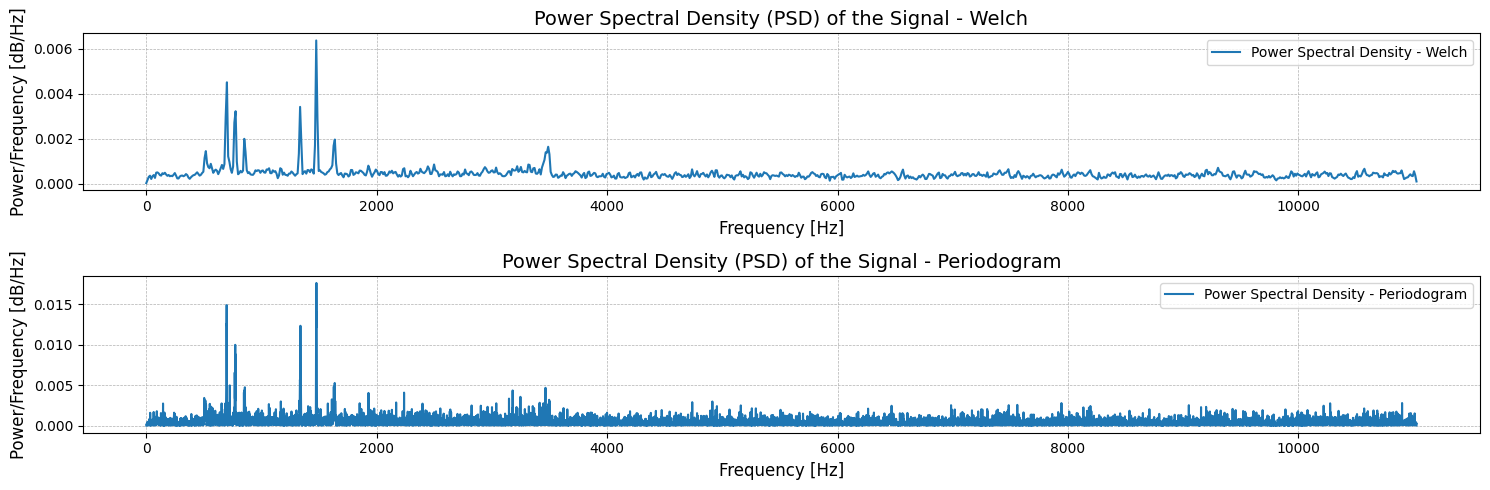

In [27]:
# Welch
frequencies_welch, psd_welch = signal.welch(X_train[0], fs=22050, nperseg=2048)

# Periodogram
frequencies_periodogram, psd_periodogram = signal.periodogram(X_train[0], fs=22050)

fig, ax = plt.subplots(2, 1, figsize=(15, 5))

# Plotting the PSD
ax[0].plot(frequencies_welch, psd_welch, label='Power Spectral Density - Welch')

# Adding labels and title
ax[0].set_title("Power Spectral Density (PSD) of the Signal - Welch", fontsize=14)
ax[0].set_xlabel("Frequency [Hz]", fontsize=12)
ax[0].set_ylabel("Power/Frequency [dB/Hz]", fontsize=12)
ax[0].grid(True, linestyle="--", linewidth=0.5)
# Plotting the PSD
ax[1].plot(frequencies_periodogram, psd_periodogram, label='Power Spectral Density - Periodogram')
ax[0].legend()

# Adding labels and title
ax[1].set_title("Power Spectral Density (PSD) of the Signal - Periodogram", fontsize=14)
ax[1].set_xlabel("Frequency [Hz]", fontsize=12)
ax[1].set_ylabel("Power/Frequency [dB/Hz]", fontsize=12)
ax[1].grid(True, linestyle="--", linewidth=0.5)
ax[1].legend()

plt.tight_layout()
plt.show()


Ce qui nous est fourni par l'estimateur Welch est bien plus lisible même si moins précis au niveau des fréquences. 

On utilise le package $\texttt{ruptures}$ pour la détection de change-points. 

In [32]:
# !pip install ruptures
import ruptures as rpt

In [ ]:
for i in range(len(X_train)):
    # on veut séparer X_train en un nombre de segments et classifier selon chaque symbole. On fixe donc un nombre de breakpoints
    # égal à la longueur de la liste de symboles de y_train
    num_breakpoints = len(y_train[i])

    # Change-point detection
    algo = rpt.Pelt(model="rbf").fit(X_train[i])  # Using the RBF model for non-linear changes
    change_points = algo.predict(pen=10)  # Penalty term for the segmentation
    print(change_points)

# Question 2

In [28]:
X_test = np.load("X_test.npy", allow_pickle=True).tolist()

In [29]:
X_test

[array([-0.11986354,  1.59285965, -0.01986525, ..., -1.63190721,
         0.62423732, -1.5106623 ]),
 array([ 0.95018612, -0.71438407,  1.26761872, ..., -2.38157518,
         2.27365674, -1.30848881])]

# Question 3

# Question 4

# Question 5

# Question 6

# Question 7